In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_excel(r"C:\Users\musta\Downloads\customer_churn_large_dataset.xlsx")

In [3]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

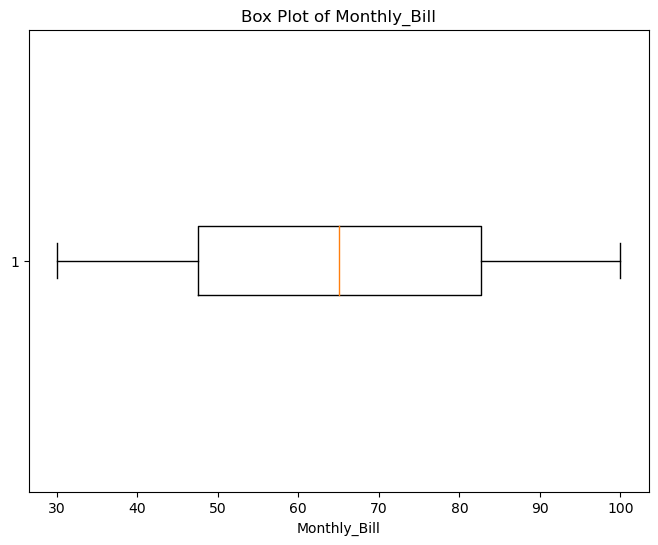

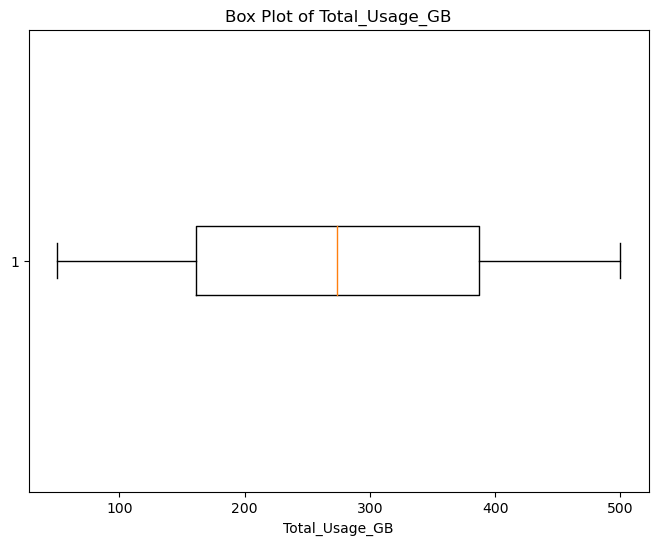

In [7]:
numeric_columns = ["Monthly_Bill", "Total_Usage_GB"]

# Create box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column], vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [8]:
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique()

# Print unique values
for column, values in unique_values.items():
    print(f"Unique values in '{column}':")
    print(values)
    print("\n")


Unique values in 'CustomerID':
[     1      2      3 ...  99998  99999 100000]


Unique values in 'Name':
['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']


Unique values in 'Age':
[63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]


Unique values in 'Gender':
['Male' 'Female']


Unique values in 'Location':
['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


Unique values in 'Subscription_Length_Months':
[17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]


Unique values in 'Monthly_Bill':
[73.36 48.76 85.47 ... 75.21 41.98 83.55]


Unique values in 'Total_Usage_GB':
[236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 3

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [10]:
data = pd.get_dummies(data, columns=['Location'], prefix=['Location'], drop_first=True)


In [11]:
data

,CustomerID,Name,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,1,17,73.36,236,0,0,1,0,0
1,2,Customer_2,62,0,1,48.76,172,0,0,0,0,1
2,3,Customer_3,24,0,5,85.47,460,0,0,1,0,0
3,4,Customer_4,36,0,3,97.94,297,1,0,0,1,0
4,5,Customer_5,46,0,19,58.14,266,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,1,23,55.13,226,1,1,0,0,0
99996,99997,Customer_99997,62,0,19,61.65,351,0,0,0,0,1
99997,99998,Customer_99998,64,1,17,96.11,251,1,0,0,0,0
99998,99999,Customer_99999,51,0,20,49.25,434,1,0,0,0,1


In [12]:
data = data.drop(["CustomerID", "Name"], axis=1)


In [13]:
data.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,1,17,73.36,236,0,0,1,0,0
1,62,0,1,48.76,172,0,0,0,0,1
2,24,0,5,85.47,460,0,0,1,0,0
3,36,0,3,97.94,297,1,0,0,1,0
4,46,0,19,58.14,266,0,0,0,1,0


In [14]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = data.drop("Churn", axis=1)  # Features, excluding the target variable 'Churn'
y = data["Churn"]  # Target variable 'Churn'

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Features for training
# X_test: Features for testing
# y_train: Target values for training
# y_test: Target values for testing


In [15]:
from sklearn.preprocessing import StandardScaler

# Feature Engineering
# 1. Age Binning
bins = [0, 25, 40, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Super Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# 2. Usage-to-Bill Ratio
data['Usage_to_Bill_Ratio'] = data['Total_Usage_GB'] / data['Monthly_Bill']


# Feature Scaling (Standardization)
scaler = StandardScaler()
numeric_columns = ["Monthly_Bill", "Total_Usage_GB", "Subscription_Length_Months"]
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Drop original 'Age' column
data.drop('Age', axis=1, inplace=True)





In [16]:
data


,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Group,Usage_to_Bill_Ratio
0,1,0.651115,0.410606,-0.294289,0,0,1,0,0,Super Senior,3.217012
1,0,-1.658879,-0.805374,-0.784852,0,0,0,0,1,Super Senior,3.527482
2,0,-1.081380,1.009204,1.422681,0,0,1,0,0,Young,5.382005
3,0,-1.370129,1.625597,0.173279,1,0,0,1,0,Middle-aged,3.032469
4,0,0.939864,-0.341720,-0.064338,0,0,0,1,0,Senior,4.575163
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,1.517363,-0.490504,-0.370939,1,1,0,0,0,Middle-aged,4.099401
99996,0,0.939864,-0.168220,0.587191,0,0,0,0,1,Super Senior,5.693431
99997,1,0.651115,1.535140,-0.179313,1,0,0,0,0,Super Senior,2.611591
99998,0,1.084239,-0.781153,1.223390,1,0,0,0,1,Senior,8.812183


In [17]:
# Re-split the data into training and testing sets if needed
X = data.drop("Churn", axis=1)
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X

,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Group,Usage_to_Bill_Ratio
0,1,0.651115,0.410606,-0.294289,0,1,0,0,Super Senior,3.217012
1,0,-1.658879,-0.805374,-0.784852,0,0,0,1,Super Senior,3.527482
2,0,-1.081380,1.009204,1.422681,0,1,0,0,Young,5.382005
3,0,-1.370129,1.625597,0.173279,0,0,1,0,Middle-aged,3.032469
4,0,0.939864,-0.341720,-0.064338,0,0,1,0,Senior,4.575163
...,...,...,...,...,...,...,...,...,...,...
99995,1,1.517363,-0.490504,-0.370939,1,0,0,0,Middle-aged,4.099401
99996,0,0.939864,-0.168220,0.587191,0,0,0,1,Super Senior,5.693431
99997,1,0.651115,1.535140,-0.179313,0,0,0,0,Super Senior,2.611591
99998,0,1.084239,-0.781153,1.223390,0,0,0,1,Senior,8.812183


In [19]:
# One-hot encoding for categorical features
data = pd.get_dummies(data, columns=['Age_Group'], drop_first=True)


In [20]:
# Re-split the data into training and testing sets if needed
X = data.drop("Churn", axis=1)
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X

,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Usage_to_Bill_Ratio,Age_Group_Middle-aged,Age_Group_Senior,Age_Group_Super Senior
0,1,0.651115,0.410606,-0.294289,0,1,0,0,3.217012,0,0,1
1,0,-1.658879,-0.805374,-0.784852,0,0,0,1,3.527482,0,0,1
2,0,-1.081380,1.009204,1.422681,0,1,0,0,5.382005,0,0,0
3,0,-1.370129,1.625597,0.173279,0,0,1,0,3.032469,1,0,0
4,0,0.939864,-0.341720,-0.064338,0,0,1,0,4.575163,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,1.517363,-0.490504,-0.370939,1,0,0,0,4.099401,1,0,0
99996,0,0.939864,-0.168220,0.587191,0,0,0,1,5.693431,0,0,1
99997,1,0.651115,1.535140,-0.179313,0,0,0,0,2.611591,0,0,1
99998,0,1.084239,-0.781153,1.223390,0,0,0,1,8.812183,0,1,0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Cross-validation (optional but recommended)
cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Accuracy: 0.502
Precision: 0.4979579013509268
Recall: 0.47928636226186877
F1 Score: 0.4884437596302003
ROC AUC Score: 0.501821968709067
Cross-Validation Scores: [0.4991875 0.4959375 0.493875  0.50225   0.5019375]
Mean CV Score: 0.49863749999999996


In [24]:
import joblib

# Save the trained model to a file
joblib.dump(random_forest_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [26]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load your dataset and perform necessary data preprocessing

# Create and train your Random Forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)  # Replace with your training data

# Save the model to a file
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [28]:
import joblib

# Load the model from the .pkl file
model = joblib.load('random_forest_model.pkl')

# Now you can inspect the model or its attributes
print(model)


RandomForestClassifier()
